# Lab 6, Gautam Kovoor, Section AD

In [141]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats

## Problem 1

This problem asks us to create a background Poisson Distribution of mean 100 and find the 5$\sigma$ threshold.

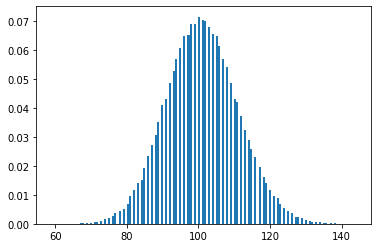

In [143]:
# Creating a fake background with a mean of a 100
mu = 100
background = stats.poisson.rvs(100, 1, 100000)
plt.hist(background, bins=150, density=True)
plt.show()

We take the log of the data to view the 5$\sigma$ threshold.

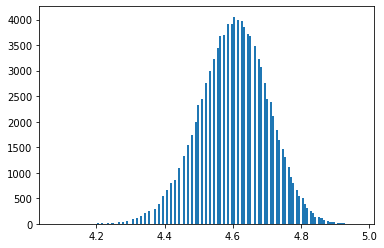

In [144]:
# Can't view 5 sigma threshold in the plot, so let's plot the log of the data
plt.hist(np.log(background), bins=150)
plt.show()

To determine the 5 sigma threshold we find the probability of 5 sigma from the CDF of the normal distribution and then use percent point function (ppf) to find the corresponding signal strength for that probability.

In [145]:
# Finding the Signal Strength with a mu of a 100
probability = stats.norm.cdf(5)
signalStrength = stats.poisson.ppf(probability, mu)
print('Signal Strength for a 5 sigma threshold is: ', signalStrength)
print('Log of the Signal Strength value: ', np.log(upperLimit))

Signal Strength for a 5 sigma threshold is:  154.0
Log of the Signal Strength value:  5.010351237772575


My lab partner and I also decided to use another method to calculate the 5 sigma threshold which was to use the 68–95–99.7 rule, where we calculate sigma based on how many standard deviations from the mean.

In [146]:
# Determining where the 5 sigma threshold is:
sig = np.std(background) * 5
mean = np.mean(background)
sig8 = mean + (np.std(background)*8)

# Similar to the 68–95–99.7 rule
upperLimit = mean + sig
print('One Sigma Threshold is: ', np.std(background) + mean)
print('The upper limit for 5 sigma is: ', upperLimit)
print('The log upper limit for 5 sigma is: ', np.log(upperLimit))
print('The upper limit for 8 sigma is: ', sig8)

One Sigma Threshold is:  111.00764984760755
The upper limit for 5 sigma is:  150.93744923803774
The log upper limit for 5 sigma is:  5.016865507535698
The upper limit for 8 sigma is:  180.88479878086042


I wasn't too sure about why we were getting different values for the signal strength at 5$\sigma$ so I chose to stick with the first method as we used that in previous labs.

## Problem 2

We chose to create a set of injected signals of signal strength 8$\sigma$ and injected this into the background around 5000 times. 

# Problem 2

The signal strength at 8 sigma threshold is:  190.0


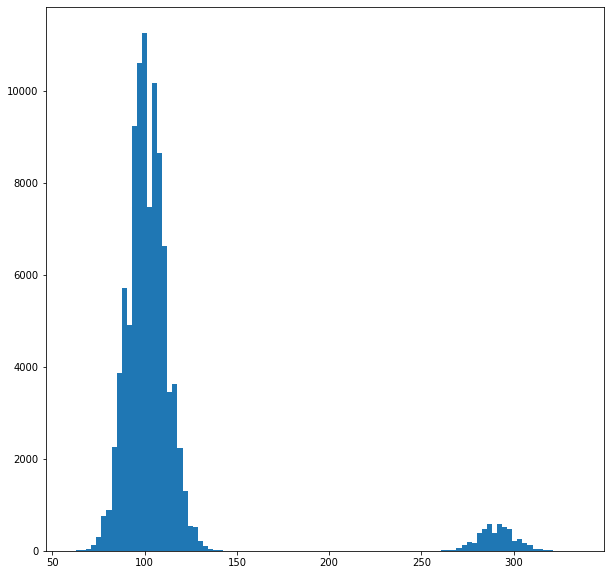

In [123]:
import random
signal = np.zeros(len(background))
probability8 = stats.norm.cdf(8)
sigma8 = stats.poisson.ppf(probability8, 100)

print('The signal strength at 8 sigma threshold is: ', sigma8)

for x in range(0, 5000):
    signal[random.randint(0, 100000)] = sigma8

obsSignal = background + signal

plt.figure(figsize=(10,10))
plt.hist(obsSignal, bins=100)
plt.show()

The histogram of the observed signal appears to be of a similar shape as the background histogram, this is because we are injecting our signal into a Poisson distribution, so it should follow the same shape.

It is expected that the size of the observed signal distribution is smaller, as I took a sample of 5000 out of a background total of 100000.

We can see that the histogram of the observed signal is symmetric around a signal strength value of 290. The value of 290 comes from the fact that the injected signal is added to the background data, so while the injected signal has a strength of 190, we are adding it to a background with a mean of 100 thus: $100 + 190 = 290$ which is why our observed signal is symmetric around 290.

We can therefore say the observed value is stronger that the true injected signal as 290 is greater than the injected signal strength of 190. Both histograms follow the Poisson distribution as a sample of the background is going to follow the same distribution.

## Problem 3

In this problem, we build up on problem 2 by injecting a suite of different signal strengths starting at zero and reaching 30$\sigma$.

Original Sigma:  100.0


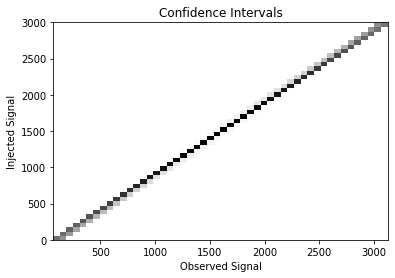

In [117]:
# Problem 3
size = len(background)

probability = stats.norm.cdf(0)
signalStrength = stats.poisson.ppf(probability, mu)

print('Original Sigma: ', signalStrength)

sigmas = np.linspace(0, 30*signalStrength, 100000)
newSignal = background + sigmas

plt.title("Confidence Intervals")
plt.ylabel("Injected Signal")
plt.xlabel("Observed Signal")

plt.hist2d(newSignal, sigmas, 50, cmap=plt.cm.Greys)
plt.show()

Using the same method as Problem 1, we calculate the signal strength at $6\sigma$ to be approximately 166 and plot a 1D histogram of it.

Signal Strength at 6 Sigma:  166.0


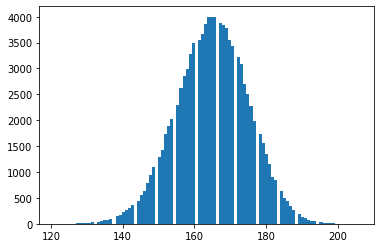

In [131]:
probability = stats.norm.cdf(6)
signalStrength = stats.poisson.ppf(probability, mu)

print('Signal Strength at 6 Sigma: ', signalStrength)

signal = np.ones(100000)*(signalStrength + 100)
injectedSignal = signal - background

plt.hist(injectedSignal, 100)
plt.show()

The observed signal at roughly $6\sigma$ would be 266 as we are adding a background with a mean of 100. When we subtract the background from the observed signal, we get a histogram with a mean of roughly 166 which is the signal strength of the injected signal.

We can calcuate the one sigma uncertainty of our signal by using the same method as in Problem 1, except we use the mean of the injected signal instead of the mean of 100 of the background.

In [128]:
meanInjected = np.mean(injectedSignal)
probability = stats.norm.cdf(1)
signalStrength = stats.poisson.ppf(probability, meanInjected)
print('The uncertainity is: ', signalStrength - meanInjected)

The uncertainity is:  12.993230000000011


To find if our observed signal is symmetric we could find the difference in the upper and lower limits of the signal and see if it is equal to 0. This would mean we have a symmetric histogram.

## Problem 4

We already know that 0 sigma is roughly 100 so we will pick a weak signal of 1$\sigma$.

Signal Strength at 1 sigma is:  110.0


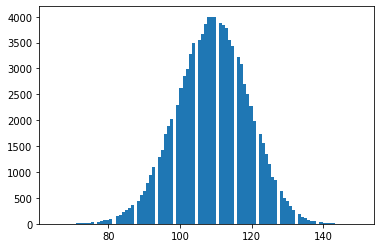

In [133]:
probability = stats.norm.cdf(0)
signalStrength = stats.poisson.ppf(probability, mu)

probability1 = stats.norm.cdf(1)
signalStrength1 = stats.poisson.ppf(probability1, mu)

print('Signal Strength at 1 sigma is: ', signalStrength1)

signal = np.ones(100000)*(signalStrength1 + 100)
signal1 = signal - background

plt.hist(signal1, 100)
plt.show()

We need to plot the PDF of the function, this is the probability mass function in Poisson (PMF).

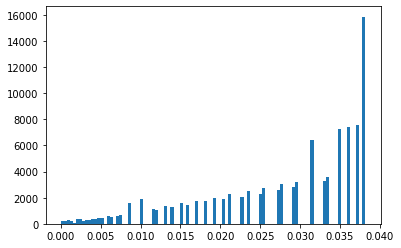

In [138]:
plt.hist(stats.poisson.pmf(signal1, np.mean(signal1)), 100)
plt.show()

A PDF/PMF extending to zero simply means that if we have a signal strength of zero, the signal of the background is the reason we have higher counts.

In [140]:
upperBound = stats.poisson.ppf(0.95, np.mean(signal1))
print('The upper bound is: ', upperBound)

The upper bound is:  126.0
